# Preprocess

## Imports

In [2]:
import pandas as pd
import sys

import shap
from catboost import CatBoostRegressor

sys.path.append("src/")

from visualization import mpsettings
from feng.Feature_creator import add_new_features
import matplotlib.pyplot as plt



## Global varriables

In [6]:
PATH = "data/"
#features = ["vgos","ugos","vgosa","ugosa"]
fpath ="data"
experiment = "2005-2012"

# Process

## Load data

In [33]:
Eddy = pd.read_csv(
    #PATH+
    fpath+".csv")

Text(0.5, 1.0, 'Eddy longevity-radius correlation\n From the Aviso 2005-2012 observation')

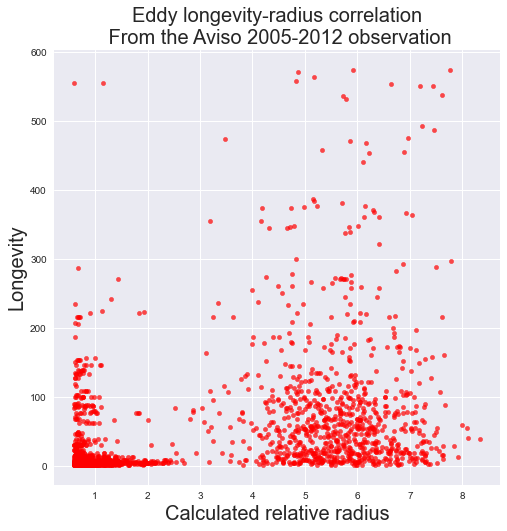

In [34]:
Eddy[(Eddy.Longevity > 1) &(Eddy.Longevity < 600) ].plot.scatter(x = "radius",y = "Longevity", alpha = .7,color ="red")
plt.xlabel("Calculated relative radius")
plt.ylabel("Longevity")
plt.title(f"Eddy longevity-radius correlation\n From the Aviso {experiment} observation")

## Machine learning

In [35]:
model = CatBoostRegressor(25000,l2_leaf_reg=7)

In [36]:
train = Eddy.sample(int(len(Eddy)*0.9))
test = Eddy.drop(train.index)

In [37]:
x_train = train.drop(["Longevity","Born","Dead","latitude","longitude","Errcount"],axis=1)
y_train = train.Longevity

x_test = test.drop(["Longevity","Born","Dead","latitude","longitude","Errcount"],axis=1)
y_test = test.Longevity

In [38]:
model.fit(x_train,y_train,verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Visualizations

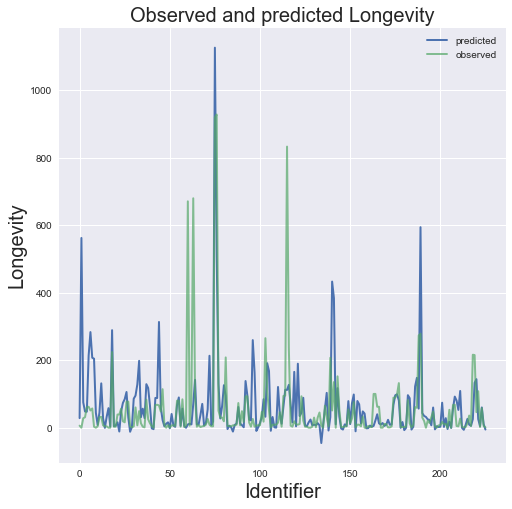

In [53]:
plt.plot(range(len(x_test)),model.predict(x_test), label = "predicted")
plt.plot(range(len(x_test)),y_test, label = "observed", alpha = .7)
plt.xlabel("Identifier")
plt.ylabel("Longevity")
plt.title("Observed and predicted Longevity")
plt.legend()

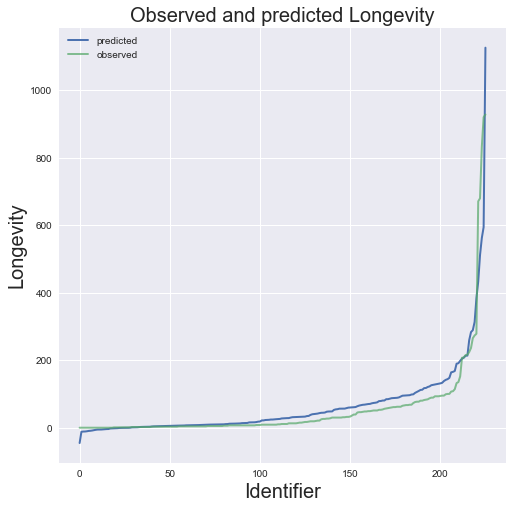

In [54]:
plt.plot(range(len(x_test)),pd.Series(model.predict(x_test)).sort_values(), label = "predicted")
plt.plot(range(len(x_test)),y_test.sort_values(), label = "observed", alpha = .7)
plt.xlabel("Identifier")
plt.ylabel("Longevity")
plt.title("Observed and predicted Longevity")
plt.legend()

In [55]:
shap.initjs()

In [56]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [69]:
identifier = 65
shap.force_plot(explainer.expected_value, shap_values[identifier,:], x_train.iloc[identifier,:])

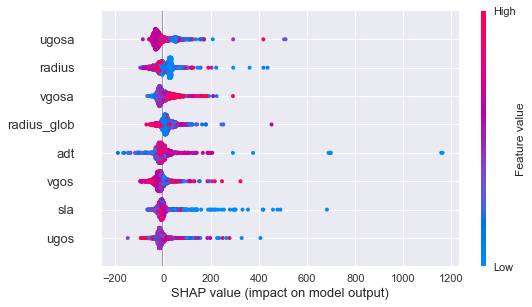

In [59]:
shap.summary_plot(shap_values,x_train)

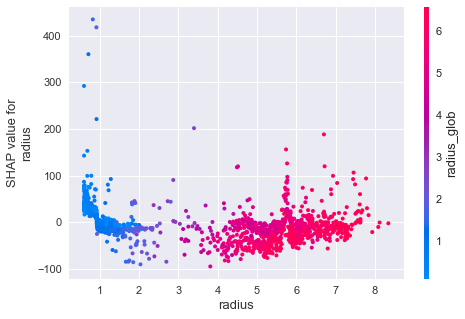

In [60]:
shap.dependence_plot("radius",shap_values,x_train)